In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy import interpolate

In [37]:
figsize = (8,6)
plt.rc('font', family='sans-serif')
plt.rc('axes', labelsize='x-large')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')
plt.rc('axes',titlesize='x-large')
#print(plt.rcParams.keys())

In [8]:
dist, eff, excl = np.genfromtxt('exclusions_halo1.txt',unpack=True,skip_header=1)

### just plot raw data 

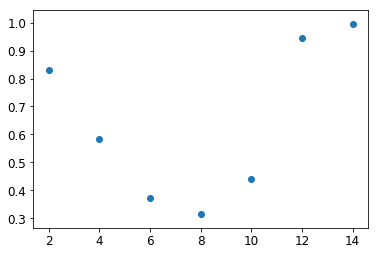

In [9]:
plt.scatter(dist,excl)
plt.show()
# Note, you can see a good downward trend until 10 kpc. At that point, stuff is messed up. 
# Some of is because it has trouble creating contours. For example, the exclusion=1 is probably bc no contour was found.

### Use good data + interpolation/extrapolation to create full data set

In [21]:
# Good data (mostly)

dist_good = []; excl_good = []
for i in range(len(dist)):
    if dist[i] <= 8:
        dist_good.append(dist[i])
        excl_good.append(excl[i])

In [22]:
# Extrapolation

# linear fit and extrapolate
params = np.polyfit(dist_good,excl_good,1)
def f(x):
    return params[0]*x + params[1]
dist_extend = [10,12,14]
for d in dist_extend:
    dist_good.append(d)
    if f(d) >= 0:
        excl_good.append(f(d))
    else:
        excl_good.append(0)

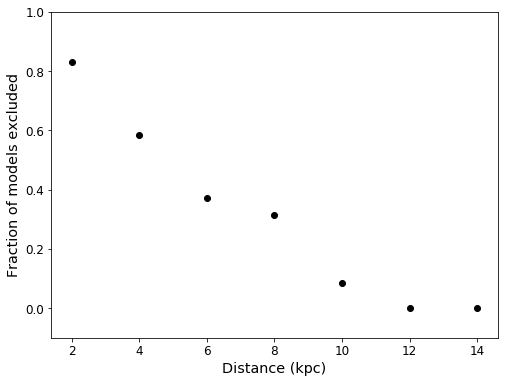

In [40]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.scatter(dist_good,excl_good,color='black')

ax.set_ylim(-0.1,1)
ax.set_ylabel('Fraction of models excluded')
ax.set_xlabel('Distance (kpc)')

pylab.savefig('figure_of_merit_halo1.png')

plt.show()